In [28]:
import peachbox
import os
import sys
import pandas as pd

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [30]:
# Set file system to local fs
dwh = peachbox.DWH.Instance()
dwh.fs = peachbox.fs.Local()
dwh.fs.dwh_path = '/peachbox/tutorial/dwh'

In [31]:
from model.master import ReviewProperties
from model.master import ProductReviewEdge
from model.master import UserReviewEdge


In [32]:
properties = dwh.query_by_key_range(ReviewProperties, 0, sys.maxint)
edges      = dwh.query_by_key_range(ProductReviewEdge, 0, sys.maxint)

In [33]:
reviews = properties.join(edges, properties.review_id==edges.review_id)

In [34]:
reviews.count()

41605

In [8]:
reviews = reviews.select(properties.true_as_of_seconds, properties.review_id, edges.product_id, properties.score)

In [24]:
# Use sample and export to Pandas
df = reviews.sample(withReplacement=False, fraction=1.0, seed=23456743).toPandas()

In [25]:
df['dt'] = pd.DatetimeIndex(df.true_as_of_seconds.index.asi8*10**9, tz='utc')

In [26]:
df = df.set_index(['dt'])

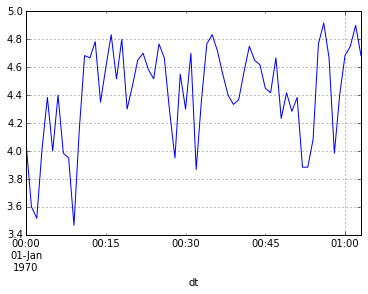

In [27]:
df.resample(rule='T', how='mean')['score'].plot()

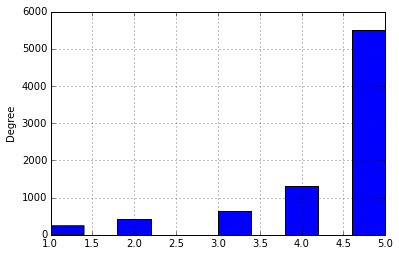

In [18]:
df['score'].plot(kind='hist')